In [4]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    
    "A" : [1,2,3,4],
    "B" : [5,6,7,8],
    "C" : [0,0,0,0],
    "D" : [1,1,1,1]
})

In [3]:
df

,A,B,C,D
0,1,5,0,1
1,2,6,0,1
2,3,7,0,1
3,4,8,0,1


### Method 1: Variance Threshold

This will remove all the feature having low variance. This will only consider X as an Training data, This has nothing to do with 
the Y which is testing data as it is just checking wheather the feature has low variance or not. That is it!

In [4]:
from sklearn.feature_selection import VarianceThreshold

In [5]:
var_thr = VarianceThreshold(threshold = 0)


In [6]:
## then just fit the data

In [7]:
var_thr.fit(df) ## as there is no Y data in this df, just take whole df

VarianceThreshold(threshold=0)

In [8]:
var_thr.get_support()

## this gives True = Do not remove as there is some variance
## false = low variance so remove it!

## this might sound contradicting but false = low variance

array([ True,  True, False, False])

In [9]:
not_needed = [column for column in df.columns if column not in df.columns[var_thr.get_support()]]

## this will give list of features to be removed

In [10]:
not_needed

['C', 'D']

### Just drop it now

In [11]:
df = df.drop(["C" , "D"], axis = 1)

In [12]:
df

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


### Try it on real DataFrame

In [13]:
ab = pd.read_csv("titanic.csv")
ab["Random"] = 0

## adding random column for purpose, it will be discussed soon

In [14]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Random       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [15]:
ab["Age"].fillna(0, inplace = True)

In [16]:
ab["Sex"] = ab["Sex"].map({"male" : 0, "female" : 1})

In [17]:
## unfortunately had to drop before f feature becoz it was giving trouble

## that is why we included one random column

In [18]:
X = ab.drop(["Survived", "Name", "Cabin", "Ticket", "Cabin", "Embarked"], axis = 1)

In [19]:
y = ab["Survived"]

In [20]:
## train, test

In [21]:
from sklearn.model_selection import train_test_split

### Never forget to train test split before VarianceThreshold calling

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [23]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Random
298,299,1,0,0.00,0,0,30.5000,0
884,885,3,0,25.00,0,0,7.0500,0
247,248,2,1,24.00,0,2,14.5000,0
478,479,3,0,22.00,0,0,7.5208,0
305,306,1,0,0.92,1,2,151.5500,0
...,...,...,...,...,...,...,...,...
106,107,3,1,21.00,0,0,7.6500,0
270,271,1,0,0.00,0,0,31.0000,0
860,861,3,0,41.00,2,0,14.1083,0
435,436,1,1,14.00,1,2,120.0000,0


In [24]:
var1 = VarianceThreshold()

In [25]:
var1.fit(X_train)

VarianceThreshold()

In [26]:
var1.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False])

In [27]:
not_need =  [column for column in X_train.columns if column not in X_train.columns[var1.get_support()]]

In [28]:
not_need

['Random']

In [29]:
## so there is one which needs to br removed

In [30]:
X_train = X_train.drop(not_need, axis = 1)

In [31]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
298,299,1,0,0.00,0,0,30.5000
884,885,3,0,25.00,0,0,7.0500
247,248,2,1,24.00,0,2,14.5000
478,479,3,0,22.00,0,0,7.5208
305,306,1,0,0.92,1,2,151.5500
...,...,...,...,...,...,...,...
106,107,3,1,21.00,0,0,7.6500
270,271,1,0,0.00,0,0,31.0000
860,861,3,0,41.00,2,0,14.1083
435,436,1,1,14.00,1,2,120.0000


In [32]:
X_test

## X_train removal will not remove it from test one

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Random
709,710,3,0,0.0,1,1,15.2458,0
439,440,2,0,31.0,0,0,10.5000,0
840,841,3,0,20.0,0,0,7.9250,0
720,721,2,1,6.0,0,1,33.0000,0
39,40,3,1,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...,...
880,881,2,1,25.0,0,1,26.0000,0
425,426,3,0,0.0,0,0,7.2500,0
101,102,3,0,0.0,0,0,7.8958,0
199,200,2,1,24.0,0,0,13.0000,0


In [33]:
## So, do it on X itself and train, test again

In [34]:
X = X.copy().drop(not_need, axis = 1)

In [35]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,3,1,0.0,1,2,23.4500
889,890,1,0,26.0,0,0,30.0000


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Method 2: Drop Features Using Pearson Correlation

If features are related to Y then do not remove it, but if features are related to other feature then have to remove them.

In [ ]:
from sklearn.datasets import load_boston

In [45]:
bos = load_boston()

In [50]:
dir(bos)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [60]:
df1 = pd.DataFrame(bos["data"], columns = bos["feature_names"])

In [61]:
df1["Target"] = bos["target"]

In [62]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [63]:
X = df1.drop(["Target"], axis = 1)

In [65]:
y = df1["Target"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [67]:
## generate corelation graph for X_train

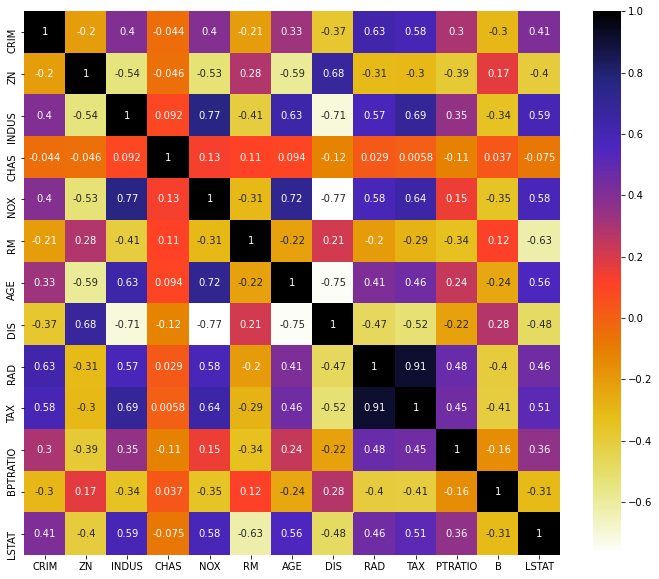

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize = (12,10))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)

plt.show()

### Pearson corelation -1 to 1

In [78]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

## this is important if we have more than 100 features as 100*100 heatmaps looks horrible to get info from

In [81]:
corr_features = correlation(X_train, 0.7)

## you can set the threshold of your own, here it is 0.7

### Do not perform same thing on X_test to avoid overfitting, just delete those feature from X train and test

In [83]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

### Drop these from X_train and X_test

In [88]:
X_train.drop(corr_features, axis = 1, inplace = True)

C:\Users\rupen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [89]:
X_train

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0.0,7.155,3.0,17.8,394.12,4.82
155,3.53501,0.0,19.58,1.0,6.152,5.0,14.7,88.01,15.02
280,0.03578,20.0,3.33,0.0,7.820,5.0,14.9,387.31,3.76
126,0.38735,0.0,25.65,0.0,5.613,2.0,19.1,359.29,27.26
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,5.836,5.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,5.856,3.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,6.635,4.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,6.629,24.0,20.2,109.85,23.27


In [90]:
X_test.drop(corr_features, axis = 1, inplace = True)

C:\Users\rupen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [91]:
X_test

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,6.416,5.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,6.758,4.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,5.983,4.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,6.065,4.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,6.297,24.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...
418,73.53410,0.0,18.10,0.0,5.957,24.0,20.2,16.45,20.62
117,0.15098,0.0,10.01,0.0,6.021,6.0,17.8,394.51,10.30
42,0.14150,0.0,6.91,0.0,6.169,3.0,17.9,383.37,5.81
322,0.35114,0.0,7.38,0.0,6.041,5.0,19.6,396.90,7.70


### Method 3: For classification problem

Here we are selecting features based on information gain

In [184]:
wine = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [185]:
X = wine.drop("Wine", axis = 1)
y = wine["Wine"]

In [186]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (X, y, random_state = 42)

### import the correct model, PS: This is only for Classification

In [187]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information based on train data

info = mutual_info_classif(X_train, y_train)
info

array([0.46582072, 0.26861014, 0.10337182, 0.27099474, 0.19491582,
       0.38686022, 0.72019645, 0.10012144, 0.29588182, 0.54237173,
       0.59910697, 0.50476476, 0.5586209 ])

In [188]:
info = pd.Series(info)
info.index = X_train.columns
info.sort_values(inplace = True)


In [189]:
len(info)

13

In [190]:
x_axis = range(13)

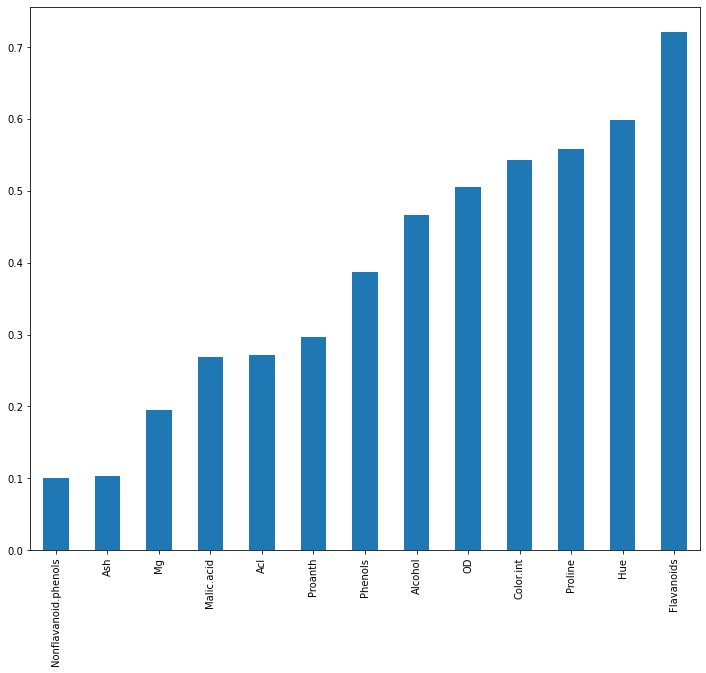

In [191]:
info.plot(kind = "bar",figsize = (12,10))

plt.show()

## this is plot of dependency 

In [192]:
## let say i want to select the top N features and that also automatically

In [193]:
from sklearn.feature_selection import SelectKBest

In [194]:
top_N_feature = SelectKBest(mutual_info_classif, k = 5) ## here we are using, mutual_info_classif from sklearn
top_N_feature.fit(X_train, y_train)

remove = X_train.columns[top_N_feature.get_support()].tolist()

In [195]:
remove

['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline']

In [196]:
X_train = X_train.drop(remove, axis = 1)

In [197]:
X_test = X_test.drop(remove, axis = 1)

### Method 4: Regression problem

In [198]:
hd = pd.read_csv("train.csv")


In [199]:
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [200]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [201]:
hd.shape

## has total 81 columns


(1460, 81)

## lets keep only int and float

In [202]:
numeric = list (hd.select_dtypes(include=['int64',"float64"]))

In [203]:
len(numeric)

38

In [204]:
hd = hd[numeric]

## made new df with same name with numeric value columns

In [205]:
hd.shape

(1460, 38)

In [206]:
hd.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [207]:
hd.fillna(0, axis = 1, inplace = True)

In [208]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [209]:
## LOOKS GOOD!

In [210]:
X = hd.drop("SalePrice", axis = 1)

In [211]:
y = hd["SalePrice"]

###  Import model

In [212]:
from sklearn.feature_selection import mutual_info_regression

### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (X, y, random_state = 42)

## performe model on Training data
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([0.01032484, 0.28767709, 0.18569815, 0.16509031, 0.56443242,
       0.10265095, 0.32789772, 0.25484583, 0.06826008, 0.1531231 ,
       0.0089656 , 0.14656297, 0.33501749, 0.29224253, 0.22071187,
       0.01124593, 0.44246011, 0.02136368, 0.00126799, 0.23788609,
       0.06781859, 0.04965216, 0.01506571, 0.17561368, 0.16461731,
       0.26177581, 0.35386281, 0.3717001 , 0.08908207, 0.16267741,
       0.03247277, 0.        , 0.02017013, 0.01049149, 0.        ,
       0.        , 0.00800335])

In [213]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.564432
GrLivArea        0.442460
GarageArea       0.371700
GarageCars       0.353863
TotalBsmtSF      0.335017
YearBuilt        0.327898
1stFlrSF         0.292243
MSSubClass       0.287677
GarageYrBlt      0.261776
YearRemodAdd     0.254846
FullBath         0.237886
2ndFlrSF         0.220712
LotFrontage      0.185698
TotRmsAbvGrd     0.175614
LotArea          0.165090
Fireplaces       0.164617
OpenPorchSF      0.162677
BsmtFinSF1       0.153123
BsmtUnfSF        0.146563
OverallCond      0.102651
WoodDeckSF       0.089082
MasVnrArea       0.068260
HalfBath         0.067819
BedroomAbvGr     0.049652
EnclosedPorch    0.032473
BsmtFullBath     0.021364
ScreenPorch      0.020170
KitchenAbvGr     0.015066
LowQualFinSF     0.011246
PoolArea         0.010491
Id               0.010325
BsmtFinSF2       0.008966
YrSold           0.008003
BsmtHalfBath     0.001268
MoSold           0.000000
3SsnPorch        0.000000
MiscVal          0.000000
dtype: float64

In [216]:

from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000002749CC74F70>)

In [217]:
X_train.columns[selected_top_columns.get_support()]

## this all features are in top 20th percentile of all features, which means all the remaining have less dependency
## remove these four

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')

### Last Method 5:


Fisher Score- Chisquare Test For Feature Selection
Compute chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task.
This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [5]:
tt = pd.read_csv("titanic.csv")

In [6]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
## just need categorical values in classification task, titanic is itself classification based on survived feature

In [8]:
class_col = ["Sex", "Pclass", "Survived", "Embarked"]

In [9]:
tt = tt[class_col]

tt

,Sex,Pclass,Survived,Embarked
0,male,3,0,S
1,female,1,1,C
2,female,3,1,S
3,female,1,1,S
4,male,3,0,S
...,...,...,...,...
886,male,2,0,S
887,female,1,1,S
888,female,3,0,S
889,male,1,1,C


In [10]:
tt.isna().sum()

Sex         0
Pclass      0
Survived    0
Embarked    2
dtype: int64

In [11]:
tt["Embarked"].isna().sum()

2

In [12]:
tt["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
tt.dropna(how = "any", inplace = True)

In [14]:
## do the dummies but with the map mrthod because the chi2 takes only one fearutre

In [15]:
tt["Sex"] = tt["Sex"].map({"male" : 0, "female": 1})

In [16]:
tt["Embarked"] = tt["Embarked"].map({"S": 0, "C": 1, "Q": 3})

In [20]:
tt.head()

,Sex,Pclass,Survived,Embarked
0,0,3,0,0
1,1,1,1,1
2,1,3,1,0
3,1,1,1,0
4,0,3,0,0


In [21]:
X = tt.drop("Survived", axis = 1)

In [22]:
y = tt["Survived"]

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (X, y, random_state = 42)

### Import the module

In [24]:
from sklearn.feature_selection import chi2

In [30]:
fpv = chi2(X_train, y_train) ## this will give, f regression and p values for each feature

fpv

(array([128.07330493,  21.54127593,   5.35421435]),
 array([1.08172967e-29, 3.46294402e-06, 2.06722461e-02]))

In [28]:
p_val = fpv[1]

In [34]:
pd.DataFrame({"P Values": p_val}, index = X_train.columns)

,P Values
Sex,1.081730e-29
Pclass,3.462944e-06
Embarked,2.067225e-02


### Observation: Sex column is important for survivle prediction and the importance decreases as go down